# Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Data Exploration

In [2]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\archive (3)\\online_retail.csv")

In [3]:
df

,InvoiceNo,StockCode,Description
0,562583,35637A,IVORY STRING CURTAIN WITH POLE
1,562583,35638A,PINK AND BLACK STRING CURTAIN
2,562583,84927F,PSYCHEDELIC TILE HOOK
3,562583,22425,ENAMEL COLANDER CREAM
4,562583,16008,SMALL FOLDING SCISSOR(POINTED EDGE)
...,...,...,...
227755,C581229,23158,SET OF 5 LUCKY CAT MAGNETS
227756,C581229,22712,CARD DOLLY GIRL
227757,C581229,22027,TEA PARTY BIRTHDAY CARD
227758,C581229,21508,VINTAGE KID DOLLY CARD


In [4]:
df.head()

,InvoiceNo,StockCode,Description
0,562583,35637A,IVORY STRING CURTAIN WITH POLE
1,562583,35638A,PINK AND BLACK STRING CURTAIN
2,562583,84927F,PSYCHEDELIC TILE HOOK
3,562583,22425,ENAMEL COLANDER CREAM
4,562583,16008,SMALL FOLDING SCISSOR(POINTED EDGE)


# Data Preprocessing

In [5]:
#finding null values
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description    356
dtype: int64

In [6]:
#filling null values
df['Description'].fillna('Unknown',inplace=True)

In [7]:
#rechecking for the null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
dtype: int64

In [10]:
# Group by 'InvoiceNo' and create lists of 'Description' for each transaction

transactions = df.groupby('InvoiceNo')['Description'].apply(list).reset_index(name='items')
transactions.head()


,InvoiceNo,items
0,549687,"[DOORMAT RED RETROSPOT, DOORMAT WELCOME SUNRIS..."
1,550644,"[SET OF 6 SPICE TINS PANTRY DESIGN, PANTRY WAS..."
2,552695,"[BIRTHDAY PARTY CORDON BARRIER TAPE, ICE CREAM..."
3,553857,"[VINTAGE GLASS T-LIGHT HOLDER, SET/6 BEAD COAS..."
4,557499,"[PARTY CHARMS 50 PIECES, PACK OF 6 LARGE FRUIT..."


In [11]:
# Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(transactions['items']).transform(transactions['items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded_num=df_encoded.astype(int)
df_encoded_num.head()

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,wet boxes,wet pallet,wet rusty,wet?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis(EDA)

<Axes: ylabel='Count'>

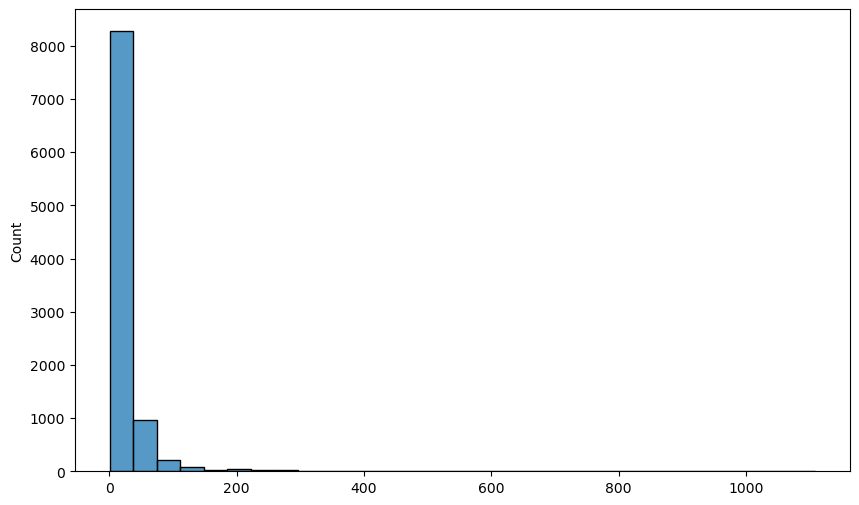

In [12]:
#Transaction Size Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded.sum(axis=1), bins=30, kde=False)

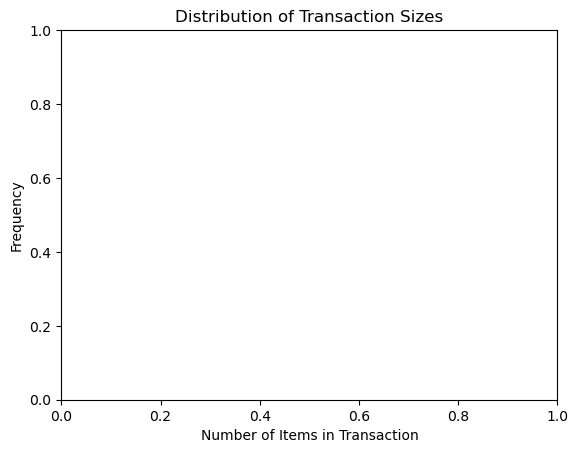

In [13]:
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Number of Items in Transaction')
plt.ylabel('Frequency')
plt.show()

In [14]:
#Top Items
top_items = df_encoded.sum().sort_values(ascending=False).head(10)
top_items

PAPER CHAIN KIT 50'S CHRISTMAS        900
JUMBO BAG RED RETROSPOT               795
HOT WATER BOTTLE KEEP CALM            763
WHITE HANGING HEART T-LIGHT HOLDER    739
JUMBO BAG VINTAGE DOILY               665
RABBIT NIGHT LIGHT                    662
PAPER CHAIN KIT VINTAGE CHRISTMAS     641
JUMBO BAG 50'S CHRISTMAS              624
POPCORN HOLDER                        614
ASSORTED COLOUR BIRD ORNAMENT         589
dtype: int64

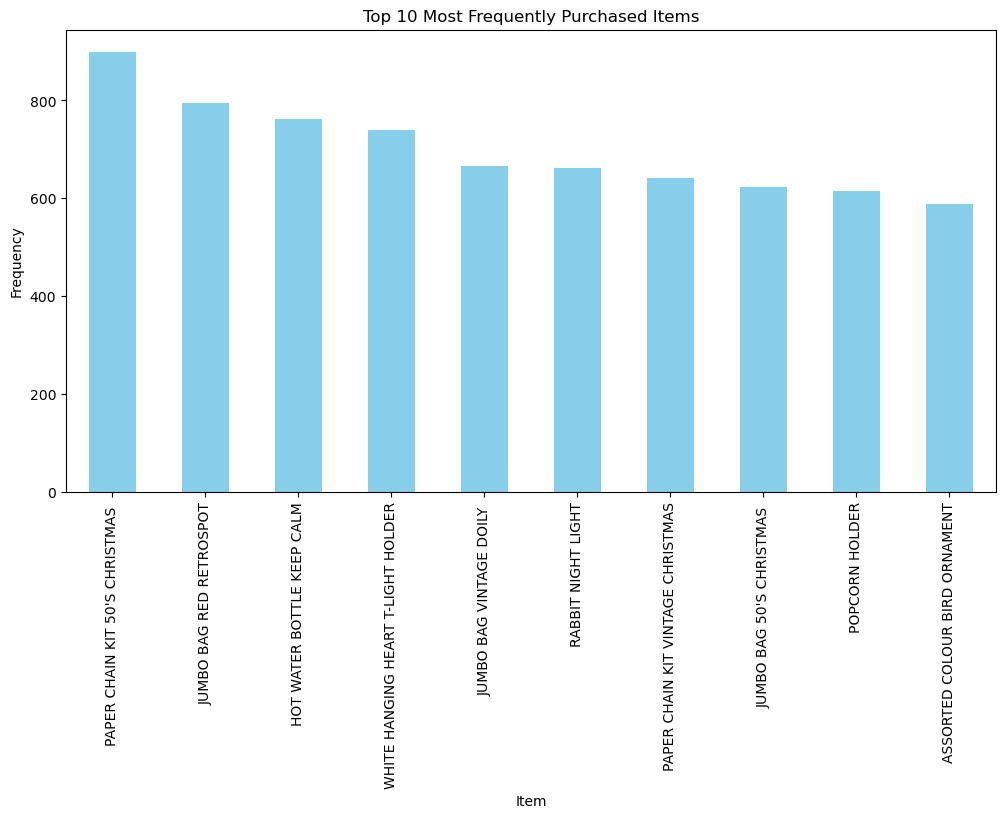

In [15]:
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.show()

In [16]:
#Apriori Algorithm for Association Rule Mining
min_support_value = 0.02 
frequent_itemsets = apriori(df_encoded, min_support=min_support_value, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020805,(12 PENCIL SMALL TUBE WOODLAND)
1,0.021629,(15CM CHRISTMAS GLASS BALL 20 LIGHTS)
2,0.020187,(3 DRAWER ANTIQUE WHITE WOOD CABINET)
3,0.022247,(3 HEARTS HANGING DECORATION RUSTIC)
4,0.023689,(3 STRIPEY MICE FELTCRAFT)
...,...,...
327,0.024719,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."
328,0.035843,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN S..."
329,0.022350,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T..."
330,0.025028,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR..."


In [17]:
# Association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [18]:
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PAPER CHAIN KIT 50'S CHRISTMAS ),(60 CAKE CASES VINTAGE CHRISTMAS),0.092697,0.047482,0.021011,0.226667,4.773767,0.016610,1.231705,0.871288
1,(60 CAKE CASES VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.047482,0.092697,0.021011,0.442516,4.773767,0.016610,1.627496,0.829928
2,(SET OF 20 VINTAGE CHRISTMAS NAPKINS),(60 CAKE CASES VINTAGE CHRISTMAS),0.046349,0.047482,0.020393,0.440000,9.266725,0.018193,1.700926,0.935444
3,(60 CAKE CASES VINTAGE CHRISTMAS),(SET OF 20 VINTAGE CHRISTMAS NAPKINS),0.047482,0.046349,0.020393,0.429501,9.266725,0.018193,1.671609,0.936556
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048306,0.044701,0.031826,0.658849,14.739081,0.029667,2.800221,0.979467
...,...,...,...,...,...,...,...,...,...,...
149,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.022350,0.045628,0.021011,0.940092,20.603510,0.019992,15.930675,0.973216
150,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.025028,0.045628,0.021011,0.839506,18.399019,0.019869,5.946473,0.969925
151,(WOODEN HEART CHRISTMAS SCANDINAVIAN),"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR...",0.045628,0.025028,0.021011,0.460497,18.399019,0.019869,1.807165,0.990860
152,(WOODEN STAR CHRISTMAS SCANDINAVIAN),"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",0.045628,0.022350,0.021011,0.460497,20.603510,0.019992,1.812129,0.996953


# Visulization

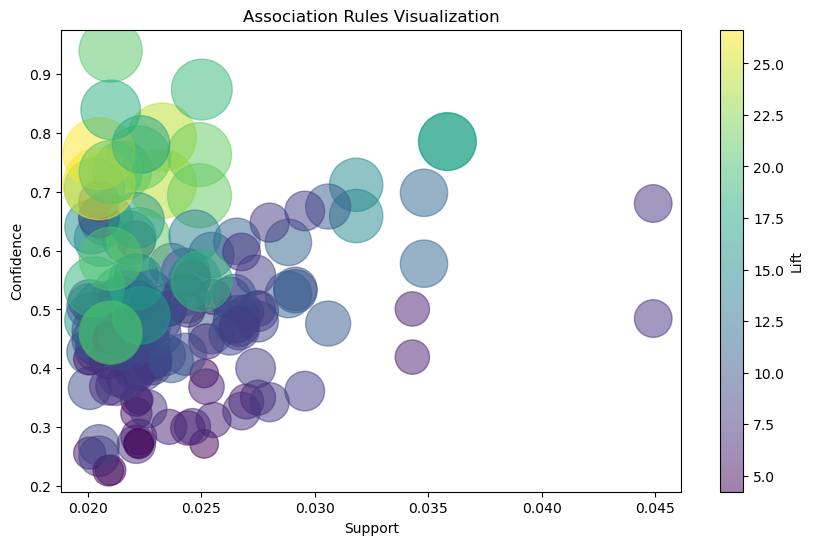

In [22]:
# Scatter plot of support vs. confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', s=rules['lift']*100, alpha=0.5)
plt.title('Association Rules Visualization')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.show()


# Making Recommendations

In [23]:
#sum of the occurences of a consequent
df_encoded_num["60 CAKE CASES VINTAGE CHRISTMAS"].sum()

461

In [24]:
#sum of occurences of an antecedent
df_encoded_num["SET OF 20 VINTAGE CHRISTMAS NAPKINS"].sum()

450

In [25]:
rule_10 = rules.iloc[10]

# Extract antecedent and consequent itemsets
antecedent_itemset = set(rule_10['antecedents'])
consequent_itemset = set(rule_10['consequents'])

# Get the sum of occurrences for antecedent and consequent itemsets
antecedent_sum = df_encoded_num[list(antecedent_itemset)].all(axis=1).sum()
consequent_sum = df_encoded_num[list(consequent_itemset)].all(axis=1).sum()
antecedent_sum 

533

In [26]:
consequent_sum

417

# Implementation

In [27]:
# Assuming 'rules' DataFrame is available with columns 'antecedents', 'consequents', 'confidence', and 'lift'

# Set criteria for filtering rules
min_confidence_threshold = 0.5
min_lift_threshold = 1.2

# Filter rules based on criteria
filtered_rules = rules[(rules['confidence'] > min_confidence_threshold) & (rules['lift'] > min_lift_threshold)]

# Display filtered rules
print(filtered_rules)

# Function to get recommendations based on current basket
def get_recommendations(current_basket):
    recommendations = set()

    for _, rule in filtered_rules.iterrows():
        antecedent_set = set(rule['antecedents'])
        consequent_set = set(rule['consequents'])

        # Check if antecedent items are in the current basket
        if antecedent_set.issubset(current_basket):
            recommendations.update(consequent_set)

    return recommendations

# Example usage
current_basket = {'60 CAKE CASES VINTAGE CHRISTMAS', 'PAPER CHAIN KIT 50\'S CHRISTMAS'}
recommendations = get_recommendations(current_basket)

print("Recommendations:", recommendations)


                                           antecedents  \
4                         (ALARM CLOCK BAKELIKE GREEN)   
5                          (ALARM CLOCK BAKELIKE RED )   
6                        (CHARLOTTE BAG PINK POLKADOT)   
7                        (RED RETROSPOT CHARLOTTE BAG)   
8                          (CHARLOTTE BAG SUKI DESIGN)   
..                                                 ...   
147               (WOODEN TREE CHRISTMAS SCANDINAVIAN)   
148  (WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN S...   
149  (WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...   
150  (WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR...   
153               (WOODEN TREE CHRISTMAS SCANDINAVIAN)   

                                           consequents  antecedent support  \
4                          (ALARM CLOCK BAKELIKE RED )            0.048306   
5                         (ALARM CLOCK BAKELIKE GREEN)            0.044701   
6                        (RED RETROSPOT CHARLOTTE BAG)            0.0